In [28]:
'''
In Texas, what type of vegetation are most cemeteries in?

Author: David Andresen
Date: 1/26/20

'''


from arcgis.gis import GIS
from arcgis.features import summarize_data

gis = GIS("https://www.arcgis.com", username="", password="")

<Item title:"Texas Vegetation Type" type:Feature Layer Collection owner:mapsgis>
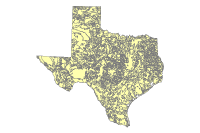

In [7]:
veg_item_id = '7790083ace944f939367bd8f38678258'

veg_item = gis.content.get(veg_item_id)
veg_item

<Item title:"Texas Cemeteries" type:Feature Layer Collection owner:TPP_GIS>
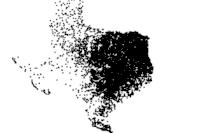

In [12]:
cemetery_item_id = '46892b74d36141949d932fc661caf3f9'

cemetery_item = gis.content.get(cemetery_item_id)
cemetery_item

In [19]:
# access layers
veg_feature_lyr = veg_item.layers[0]
cemetery_feature_lyr = cemetery_item.layers[0]

In [23]:
# view names of fields
for field in veg_feature_lyr.properties.fields:
    print(field['name'])
print('#######################')
for field in cemetery_feature_lyr.properties.fields:
    print(field['name'])

FID
AREA
PERIMETER
VEGPY03_
VEGPY03_ID
OBJECTID
VEGCOVER
CODENUM
COLOR
CODE
C1
SHAPE_AREA
SHAPE_LEN
Shape__Area
Shape__Length
#######################
OBJECTID
CEMETERY_NM
DIST_NM
CNTY_NM
Zoom


In [31]:
# get the number of cemeteries in each polygon
cemetery_summary = summarize_data.aggregate_points(
    point_layer = cemetery_feature_lyr,
    polygon_layer = veg_feature_lyr,
    keep_boundaries_with_no_points = False,
)

In [32]:
cemetery_summary

{'aggregated_layer': <FeatureCollection>, 'group_summary': <FeatureCollection>}

In [34]:
# need to access the feature collection, then query the data as a feature set
cemetery_aggregarte_fc = cemetery_summary['aggregated_layer']

cemetery_aggregarte_fset = cemetery_aggregarte_fc.query()

In [36]:
# view data as a pandas df
df = cemetery_aggregarte_fset.sdf
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669 entries, 0 to 668
Data columns (total 18 columns):
AREA             669 non-null float64
AnalysisArea     669 non-null float64
C1               669 non-null object
CODE             669 non-null object
CODENUM          669 non-null float64
COLOR            669 non-null int64
OBJECTID         669 non-null int64
OBJECTID_1       669 non-null int64
PERIMETER        669 non-null float64
Point_Count      669 non-null int64
SHAPE            669 non-null geometry
Shape_Area       669 non-null float64
Shape_Length     669 non-null float64
Shape__Area      669 non-null float64
Shape__Length    669 non-null float64
VEGCOVER         669 non-null object
VEGPY03_         669 non-null int64
VEGPY03_ID       669 non-null int64
dtypes: float64(8), geometry(1), int64(6), object(3)
memory usage: 94.2+ KB


In [50]:
# make df of groupby 
veg_group_df = df.groupby('VEGCOVER').count()['Point_Count'].reset_index()

In [51]:
# get top 15 types of vegcover 
df_15 = veg_group_df.sort_values('Point_Count',ascending=False).head(15)

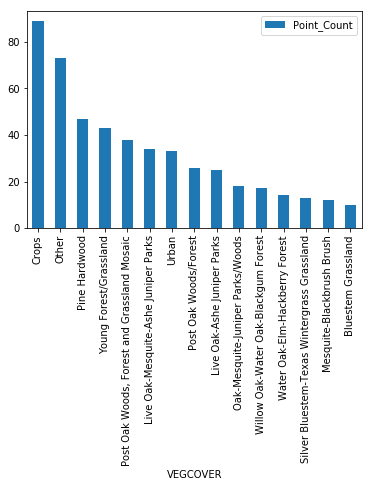

In [53]:
%matplotlib inline
df_15.plot('VEGCOVER','Point_Count', kind='bar')